In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from simpletransformers.language_representation import RepresentationModel
import numpy as np
import tensorflow as tf
import keras
from sklearn.model_selection import KFold


# Carregando base de dados  pré-processada

In [2]:
dataset = pd.read_csv("../../Database/dataBaseWithNER.csv")
dataset = dataset.drop(columns=["Unnamed: 0"])
dataset = dataset.dropna()
targets = np.array(dataset["target"].array)

dataset

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in dataset["email"]:
    emailsText.append(email)

del dataset

In [4]:
print(len(emailsText))

33341


# Representação vetorial GPT2

In [5]:
model=RepresentationModel(
    model_type="gpt2",
    model_name="gpt2",
    use_cuda=True,
    #fp16=True
)

vectorialRepresentation = model.encode_sentences(emailsText, combine_strategy="mean")
vectorialRepresentation.shape

Some weights of the model checkpoint at gpt2 were not used when initializing GPT2ForTextRepresentation: ['h.0.attn.c_proj.bias', 'h.9.ln_2.weight', 'h.8.attn.c_proj.bias', 'h.8.ln_2.bias', 'h.0.mlp.c_fc.bias', 'h.7.attn.bias', 'h.1.ln_1.bias', 'h.10.attn.c_attn.bias', 'h.3.attn.c_attn.weight', 'h.6.mlp.c_proj.weight', 'h.8.attn.c_attn.weight', 'h.5.attn.c_attn.weight', 'h.2.attn.c_proj.bias', 'h.9.attn.c_proj.weight', 'h.8.ln_1.bias', 'h.2.ln_1.weight', 'h.3.mlp.c_fc.bias', 'h.2.ln_1.bias', 'h.3.attn.c_proj.bias', 'h.4.attn.c_proj.bias', 'h.4.ln_2.bias', 'h.0.attn.c_attn.bias', 'h.0.ln_2.bias', 'h.10.attn.c_attn.weight', 'h.4.attn.c_proj.weight', 'h.5.attn.bias', 'h.11.mlp.c_fc.weight', 'h.3.ln_1.weight', 'h.5.ln_1.bias', 'h.4.mlp.c_fc.bias', 'h.11.ln_1.weight', 'h.7.ln_2.weight', 'h.11.mlp.c_proj.weight', 'h.2.attn.c_attn.bias', 'h.7.mlp.c_proj.weight', 'h.7.attn.c_attn.weight', 'h.1.attn.c_proj.weight', 'h.2.ln_2.bias', 'h.1.ln_2.weight', 'h.10.mlp.c_fc.weight', 'h.5.mlp.c_fc.weight'

(33341, 768)

In [6]:
gpt2Dataframe = pd.DataFrame(vectorialRepresentation)
gpt2Dataframe

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.578063,-1.562219,0.733528,-0.058638,0.102807,1.620385,1.365647,-0.572078,-0.815387,-2.781020,...,0.946592,1.232427,0.894165,0.027148,0.232668,0.037412,-0.670586,-0.364401,-0.319977,-1.053342
1,-0.622657,0.053144,1.068417,-0.368139,-1.178293,1.251067,0.150130,0.676408,-0.146761,-1.484483,...,-0.231804,1.282375,1.661981,-0.441529,-0.768833,-0.983972,-1.993457,0.640664,-0.010069,-1.850842
2,0.672441,-1.871471,1.020190,0.274535,-0.788345,1.747756,1.122822,0.102061,-0.308725,-2.670972,...,0.768910,1.679851,0.357598,0.624521,-0.179420,0.110053,-0.643694,-0.172248,-0.226315,-1.465842
3,0.597837,-1.746223,1.017650,0.173475,-0.535336,1.816171,1.490823,-0.008094,-0.469706,-2.843270,...,0.887539,1.504657,0.935981,0.599522,0.054418,-0.047194,-0.673326,-0.182649,-0.176225,-1.107678
4,-1.028337,-0.182032,1.087843,0.138309,-0.664889,0.816702,0.862890,0.121081,-0.749520,-1.705546,...,-0.294798,1.596552,0.873833,0.890408,-0.913309,-0.340488,-1.247871,-0.306625,0.000457,-1.804885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,0.764639,-1.408462,1.829600,-0.525103,-1.596769,2.506067,0.974421,-0.115114,0.072327,-1.600080,...,0.551293,2.203605,0.901629,0.518770,0.565980,-0.740531,-0.685751,0.523401,-0.779780,-1.579606
33337,-0.216924,-1.351918,1.099144,0.204871,-1.159167,1.484302,0.503977,0.199203,0.008998,-2.148698,...,-0.159228,1.983267,0.423999,0.937024,-0.492670,-0.496444,-0.549892,-0.349489,0.037575,-2.001184
33338,0.546038,-2.470647,1.207605,1.797069,-1.467915,1.701314,1.534451,-0.706129,-0.954505,-2.490199,...,-0.406200,1.865775,1.540000,0.946446,-0.232542,0.050942,-0.758569,-0.091412,0.397039,-0.996819
33339,0.305662,-1.203844,0.980389,0.851744,-1.239764,2.163097,0.364815,-0.100628,0.076471,-2.574973,...,-0.302633,1.986321,1.218455,0.840711,0.548881,0.348737,-1.149769,0.356195,-0.494669,-0.772472


In [ ]:
gpt2Data = np.array(gpt2Dataframe)
gpt2Data

# Visualização de dados com TSNE

E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


               0          1  Target
0     -14.011990 -71.692970       0
1      15.829963  10.544511       0
2      10.241787  52.096443       0
3      69.784821  14.447907       0
4      -6.443357  57.167374       0
...          ...        ...     ...
33336  52.482487   3.101025       1
33337  -6.246800  37.836533       1
33338  42.079762  -3.870044       1
33339   5.700751  21.373949       0
33340   2.333664  31.864038       1

[33341 rows x 3 columns]


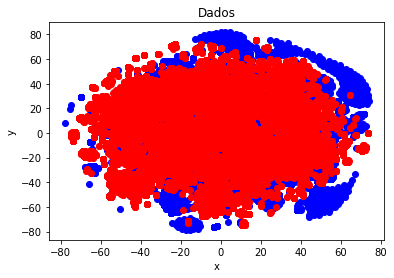

In [7]:
# model = TSNE(n_components=2, random_state=0)
# array_red = model.fit_transform(gpt2Dataframe)

# df_tsne = pd.DataFrame(array_red)

# df_tsne['Target'] = target
# print(df_tsne)
# df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

# df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

# plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

# plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

# plt.title('Dados')
# plt.xlabel('x')
# plt.ylabel('y')

# plt.show()

# Validação

In [ ]:
gpt2Data = np.array(gpt2Data)

gpt2Data = gpt2Data.reshape((gpt2Data.shape[0],1,gpt2Data.shape[1]))
print(gpt2Data.shape)

In [ ]:
foldsAccuracy = []
foldLosses = []

In [ ]:
kfold = KFold(n_splits=4, shuffle=True)

In [ ]:
foldCount = 1
for train, test in kfold.split(gpt2Data, targets):
    model = keras.models.Sequential([
        #keras.layers.Conv1D(1000, kernel_size=1, activation="relu",input_shape=gpt2Data.shape[1:]),
        keras.layers.Conv1D(640, kernel_size=1, activation="relu",input_shape=gpt2Data.shape[1:]),
        keras.layers.MaxPooling1D(pool_size=1),
        keras.layers.Flatten(),
        #keras.layers.Dense(5000, activation="relu"),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(len(set(targets)), activation="softmax")
    ])

    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

    print('****************************************************')
    print(f'Iniciando treinamento da fold: {foldCount}.')

    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4,mode='min'), tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, restore_best_weights=True)]

    history = model.fit(gpt2Data[train], targets[train], epochs=200, callbacks=callbacks, validation_split=0.05)

    scores = model.evaluate(gpt2Data[test], targets[test], verbose=0)
    print(f'Score fold {foldCount}: {model.metrics_names[0]} de {scores[0]}; {model.metrics_names[1]} de {scores[1]*100}%')

    foldsAccuracy.append(scores[1] * 100)
    foldLosses.append(scores[0])

    foldCount = foldCount + 1

****************************************************
Iniciando treinamento da fold: 1.
Epoch 1/200
743/743 [==============================] - 4s 3ms/step - loss: 0.3499 - accuracy: 0.8889 - val_loss: 0.1727 - val_accuracy: 0.9440 - lr: 0.0100
Epoch 2/200
743/743 [==============================] - 2s 2ms/step - loss: 0.2207 - accuracy: 0.9410 - val_loss: 0.1448 - val_accuracy: 0.9528 - lr: 0.0100
Epoch 3/200
743/743 [==============================] - 2s 2ms/step - loss: 0.1933 - accuracy: 0.9501 - val_loss: 0.1184 - val_accuracy: 0.9600 - lr: 0.0100
Epoch 4/200
743/743 [==============================] - 2s 2ms/step - loss: 0.1385 - accuracy: 0.9627 - val_loss: 0.0856 - val_accuracy: 0.9712 - lr: 0.0100
Epoch 5/200
743/743 [==============================] - 2s 2ms/step - loss: 0.1287 - accuracy: 0.9648 - val_loss: 0.1275 - val_accuracy: 0.9576 - lr: 0.0100
Epoch 6/200
743/743 [==============================] - 2s 2ms/step - loss: 0.0776 - accuracy: 0.9768 - val_loss: 0.0639 - val_accurac

In [ ]:
print('****************************************************')
print('Score de cada fold:')
for i in range(0, len(foldsAccuracy)):
    print('****************************************************')
    print(f'--> Fold {i+1}: Loss: {foldLosses[i]} ; Accuracy: {foldsAccuracy[i]}%')

print('****************************************************')
print('Média de accuracy das folds:')
print(f'--> Accuracy: {np.mean(foldsAccuracy)} (+- {np.std(foldsAccuracy)})')
print(f'--> Loss: {np.mean(foldLosses)}')
print('****************************************************')